<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-07-17 21:05:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  28.9MB/s    in 1.2s    

2022-07-17 21:05:54 (28.9 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [96]:
QUERY = """
SELECT DevType, COUNT(*) as Total
FROM DevType
GROUP BY DevType
ORDER BY COUNT(*) DESC
"""
df = pd.read_sql_query(QUERY,conn)
df

,DevType,Total
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


In [91]:
#Only work with MySQL
QUERY = """
SELECT DatabaseWorkedWith, COUNT(Respondent)
FROM DatabaseWorkedWith
GROUP BY Respondent
HAVING COUNT(Respondent) == 1 AND DatabaseWorkedWith == 'MySQL'
"""
df = pd.read_sql_query(QUERY,conn)
len(df)

474

In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
#pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [92]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
#print(df.iat[0,0])

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


NameError: name 'plt' is not defined

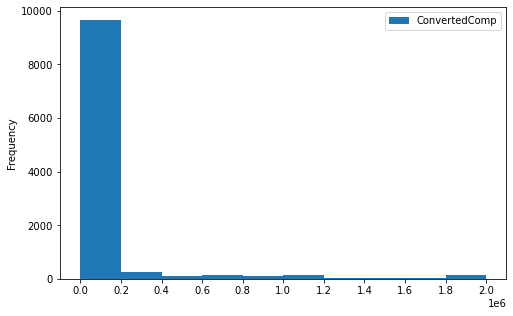

In [8]:
# your code goes here
import seaborn as sns
import numpy as np

QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

df = df[np.isfinite(df['ConvertedComp'])]

count, bin_edges = np.histogram(df['ConvertedComp'], 10)

df.plot(kind = 'hist', figsize = (8, 5), xticks = bin_edges, bins = 10)

plt.ticklabel_format(style='plain')
plt.xticks(rotation = 45)
plt.title("Compensation Distribution of Respondents")
plt.xlabel("Compensation (USD)")
plt.ylabel("Number of Respondents")

### Box Plots


Plot a box plot of `Age.`


[Text(0.5, 1.0, 'Box Plot of Ages of Respondents')]

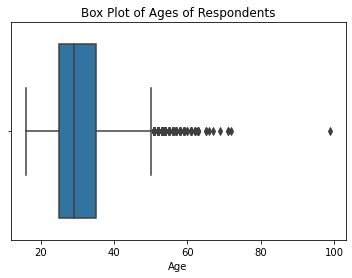

In [9]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)

#df.plot(kind='box', figsize=(8, 6))

#plt.title('Box Plot of Ages of Surveyees')
#plt.ylabel('Age')

#plt.show()

boxplot = sns.boxplot(x = df['Age'])
boxplot.set(title = 'Box Plot of Ages of Respondents')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


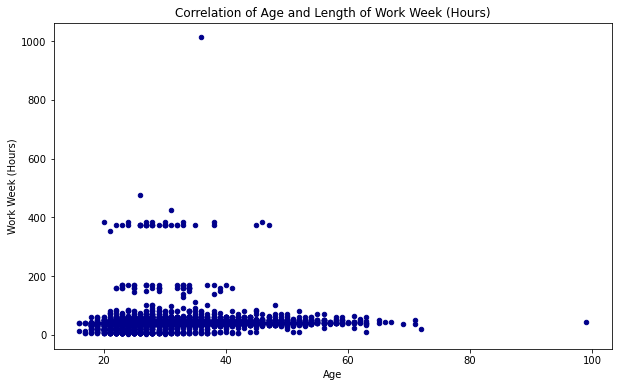

In [10]:
# your code goes here
import matplotlib.pyplot as plt

QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

df.plot(kind='scatter', x = "Age", y = "WorkWeekHrs", figsize=(10, 6), color='darkblue')

plt.title("Correlation of Age and Length of Work Week (Hours)")
plt.xlabel("Age")
plt.ylabel("Work Week (Hours)")

plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0, 0.5, 'Code Rev Hours')

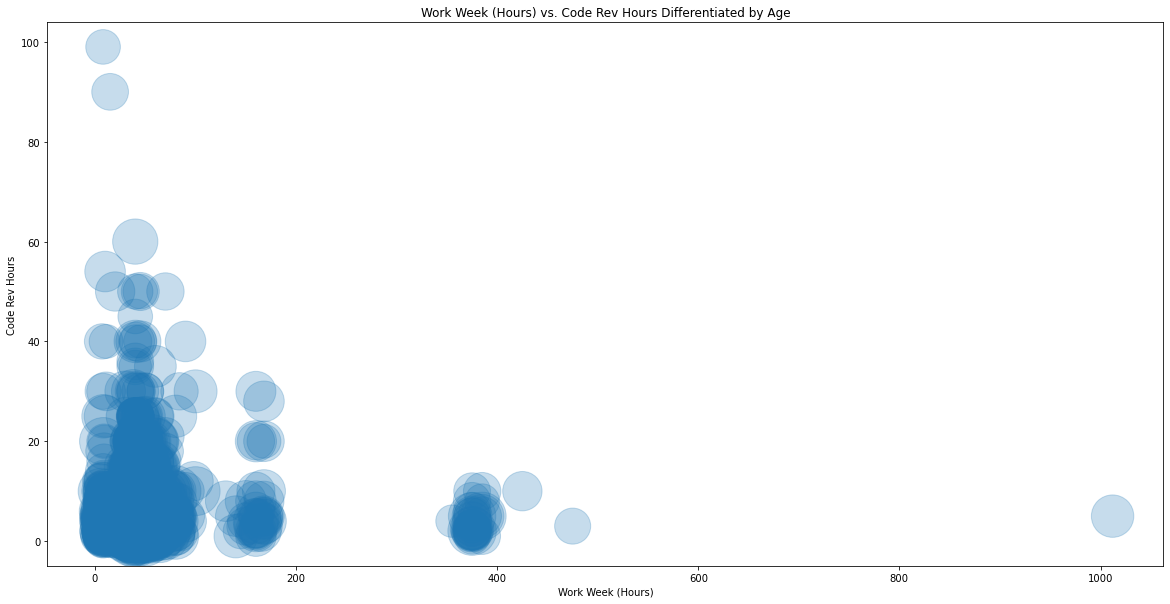

In [11]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

df.plot(kind = 'scatter',
                    x = "WorkWeekHrs",
                    y = "CodeRevHrs",
                    alpha = 0.25,
                    s = df['Age'] * 50,
                    figsize = (20, 10))

plt.title("Work Week (Hours) vs. Code Rev Hours Differentiated by Age")
plt.xlabel("Work Week (Hours)")
plt.ylabel("Code Rev Hours")

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


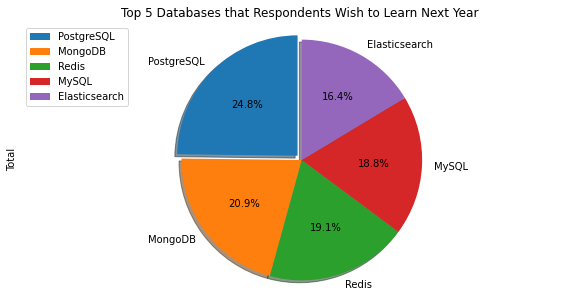

In [12]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as Total
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY COUNT(*) DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY,conn)

explode_list = [0.05, 0, 0, 0, 0]

df['Total'].plot(kind='pie', figsize=(10, 5), 
                 autopct='%1.1f%%', 
                 startangle=90, 
                 shadow=True, 
                 labels = df['DatabaseDesireNextYear'], 
                 explode = explode_list)

plt.axis('equal')
plt.title('Top 5 Databases that Respondents Wish to Learn Next Year') 
plt.legend(labels = df['DatabaseDesireNextYear'], loc = 'upper left')

plt.show()

In [20]:
QUERY = """
SELECT *
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,None,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,36.0,No,No,Appropriate in length,Difficult
11394,11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,25.0,No,No,Appropriate in length,Neither easy nor difficult
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A lot more welcome now than last year,34.0,No,Yes,Too long,Easy
11396,11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",...,Daily or almost daily,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,25.0,No,No,Appropriate in length,Easy


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


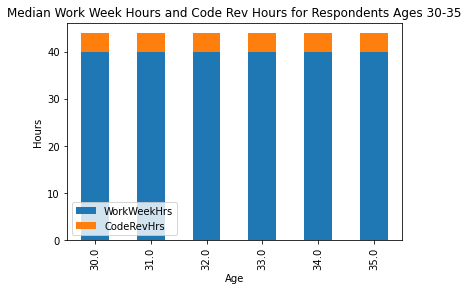

In [13]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""

df = pd.read_sql_query(QUERY,conn)

df_grouped = df.groupby('Age').median()

df_grouped.plot(kind = 'bar', stacked = True)

plt.title('Median Work Week Hours and Code Rev Hours for Respondents Ages 30-35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

#df['WorkWeekHrs'].median()
#df['CodeRevHrs'].median()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


100000.0

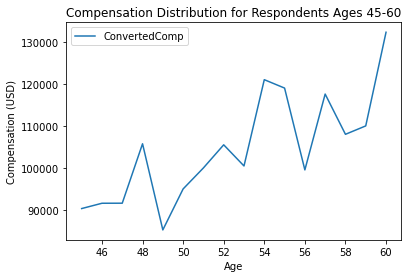

In [14]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60
"""

df = pd.read_sql_query(QUERY,conn)

df_grouped = df.groupby('Age').median()
df_grouped.plot(kind = 'line')

plt.title("Compensation Distribution for Respondents Ages 45-60")
plt.xlabel("Age")
plt.ylabel("Compensation (USD)")

df['ConvertedComp'].median()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


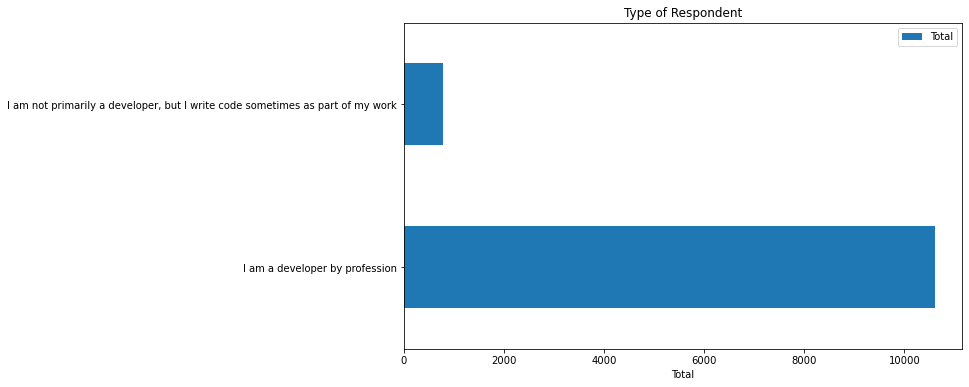

In [15]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(*) as Total
FROM master
GROUP BY MainBranch
"""

df = pd.read_sql_query(QUERY,conn)

horizontal_bar = df.plot(kind='barh', figsize=(10, 6))

horizontal_bar.set_yticklabels(df["MainBranch"])

plt.xlabel('Total')
plt.title('Type of Respondent')

plt.show()


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
